<a href="https://colab.research.google.com/github/anilkumargangadhara09/GenAI-ML/blob/main/Anil_Sales_Analysis_cep1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project statement
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.

Importing Python Libraries

In [ ]:
#Importing all the necessary libraries
import pandas as pd
import numpy as np

In [ ]:
#data reading
df = pd.read_csv('/content/AusApparalSales4thQrt2020.csv')

In [ ]:
#EDA
display(df.head(2))
display(df.info())
display(df.describe())

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


None

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


## Further Data Exploration

a box plot and a distribution plot to further explore the distribution of the Sales data.

In [ ]:
#check if any unlls in data
print(f'null values after cleaning:\n{df.isnull().sum()}')

null values after cleaning:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [ ]:
# To determine the threshold value for outliers
# with default low_q = 0.05 and upper_q = 0.95
def outliers_threshold(data, variable, low_quantile=0.05, up_quantile=0.95):
    q1 = data[variable].quantile(low_quantile) #quartile1
    q3  = data[variable].quantile(up_quantile) #quartile3
    IQR = q3 - q1
    up_limit = q3 + 1.5 * IQR
    low_limit = q1 - 1.5 * IQR
    outlier_threshold = [low_limit, up_limit]
    return low_limit, up_limit
#

In [ ]:
import seaborn as sns
#check - Are there any outliers in the variables
def has_outliers(data, numeric_columns, plot=False):
    for col in numeric_columns:
        low_limit, up_limit = outliers_threshold(data, col, 0.25, 0.75)
        print(f'The {col} lowlimit is: {low_limit} uplimit is: {up_limit}')
        if data[(data[col] > up_limit) | (data[col] < low_limit)].any(axis=None):
            number_of_outliers = data[(data[col] > up_limit) | (data[col] < low_limit)].shape[0]
            print(f'The {col} variable has outliers \n')

        else:
            print(f'The {col} variable has no outliers \n')
        plt.figure(figsize=(6, 4))
        sns.boxplot(data[col])
        # sns.displot(data[col])
        plt.title(f'Boxplot of {col}')
        plt.show()
#

The Unit lowlimit is: -19.0 uplimit is: 53.0
The Unit variable has outliers 



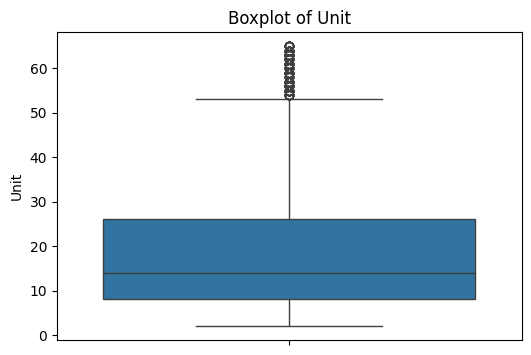

The Sales lowlimit is: -47500.0 uplimit is: 132500.0
The Sales variable has outliers 



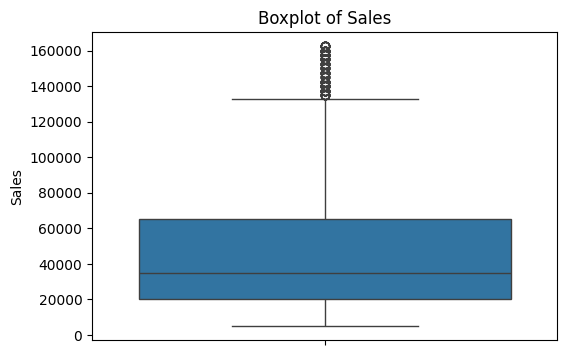

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
has_outliers(df, numeric_columns, plot=True)

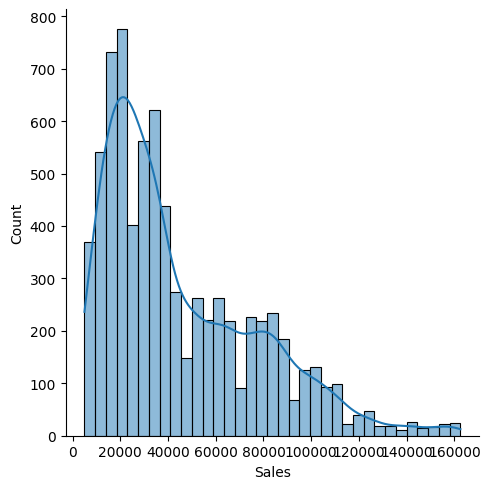

In [ ]:
sns.displot(df['Sales'], kde=True)
#

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
corre = numeric_df.corr()
display(corre)

,Unit,Sales
Unit,1.0,1.0
Sales,1.0,1.0


## Analyze sales by state

### Subtask 1: Identify the states that are generating the highest revenues
Calculate the total sales for each state to identify the states with the highest and lowest revenues.

In [ ]:
sales_by_state = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
sales_by_state

,Sales
State,
VIC,105565000
NSW,74970000
SA,58857500
QLD,33417500
TAS,22760000
NT,22580000
WA,22152500


## Visualize sales by state

Create a bar chart to visualize the total sales for each state.

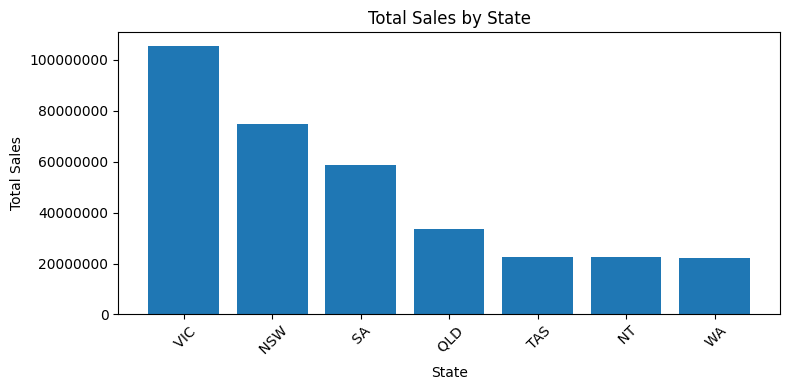

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.bar(sales_by_state.index, sales_by_state.values)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State')
plt.xticks(rotation=45)
plt.tight_layout()

### identify high and low revenue states

based on the sales analysis and visualization, clearly state that **VIC** and **NSW** have highest and **TAS, NT and WA** have lowest revenues.

Access the previously calculated `sales_by_state` Series and identify the states with the highest and lowest revenues.

In [ ]:
highest_revenue_states = sales_by_state.head(2).index.tolist()
lowest_revenue_states = sales_by_state.tail(3).index.tolist()
print("States with Highest Revenues:")
print(highest_revenue_states)
print("\nStates with Lowest Revenues:")
print(lowest_revenue_states)

States with Highest Revenues:
[' VIC', ' NSW']

States with Lowest Revenues:
[' TAS', ' NT', ' WA']


**Reasoning**:

Based on the analysis, Sales programs for states with lower revenues

Provide insights to assist the company in making data-driven decisions for the upcoming year.

In [ ]:
print(f'Sales program suggestions for lower-revenue states: {lowest_revenue_states}')
print("- Targeted marketing campaigns: Focus on digital marketing and social media tailored to the demographics and preferences of these states.")
print("- Promotional offers: Introduce limited-time discounts, bundle deals, or loyalty programs to incentivize purchases.")

print("\nInsights and recommendations for data-driven decisions for the upcoming year:")
print(f"- Leverage success in high-revenue states ({highest_revenue_states}): Analyze successful strategies in VIC and NSW and explore ways to adapt and implement them in other states.")
print("- Understand customer behavior: Deep dive into the sales data to identify trends, popular products, and customer segments in each state to tailor offerings.")
print("- Optimize inventory: Based on sales patterns, ensure sufficient stock of popular items in each region while minimizing overstock in lower-demand areas.")

Sales program suggestions for lower-revenue states: [' TAS', ' NT', ' WA']
- Targeted marketing campaigns: Focus on digital marketing and social media tailored to the demographics and preferences of these states.
- Promotional offers: Introduce limited-time discounts, bundle deals, or loyalty programs to incentivize purchases.

Insights and recommendations for data-driven decisions for the upcoming year:
- Leverage success in high-revenue states ([' VIC', ' NSW']): Analyze successful strategies in VIC and NSW and explore ways to adapt and implement them in other states.
- Understand customer behavior: Deep dive into the sales data to identify trends, popular products, and customer segments in each state to tailor offerings.
- Optimize inventory: Based on sales patterns, ensure sufficient stock of popular items in each region while minimizing overstock in lower-demand areas.


## Summary:

### Data Analysis Key Findings

*   VIC had the highest revenue in Q4 2020 at $105565000.

*   WA had the lowest revenue in Q4 2020 at $22,152,500.

### Insights to assist:

*   Implement targeted sales programs in lower-revenue states like WA, NT, and TAS, focusing on localized marketing, promotions, and improving product accessibility.




